<a href="https://colab.research.google.com/github/Lee-Minsoo-97/Templates-for-Descrptv-Predctv_Anlyt/blob/main/Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('Overhead Costs.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'Overhead Costs.xlsx'

In [ ]:
data.head()

,Month,Machine Hours,Production Runs,Overhead
0,1,1539,31,99798
1,2,1284,29,87804
2,3,1490,27,93681
3,4,1355,22,82262
4,5,1500,35,106968


In [ ]:
data.columns

Index(['Month', 'Machine Hours', 'Production Runs', 'Overhead'], dtype='object')

In [ ]:
data.rename(columns={'Machine Hours': 'Machine_Hours','Production Runs':'Production_Runs'}, inplace=True)

In [ ]:
data.columns

Index(['Month', 'Machine_Hours', 'Production_Runs', 'Overhead'], dtype='object')

# Overhead ~ Machine Hours

In [ ]:
model = smf.ols(formula='Overhead ~Machine_Hours', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Overhead   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     22.60
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           3.57e-05
Time:                        16:24:27   Log-Likelihood:                -376.13
No. Observations:                  36   AIC:                             756.3
Df Residuals:                      34   BIC:                             759.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.862e+04   1.07e+04      4.533

In [ ]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Machine_Hours,1.0,1.665463e+09,1.665463e+09,22.598565,0.000036
Residual,34.0,2.505723e+09,7.369775e+07,NaN,NaN


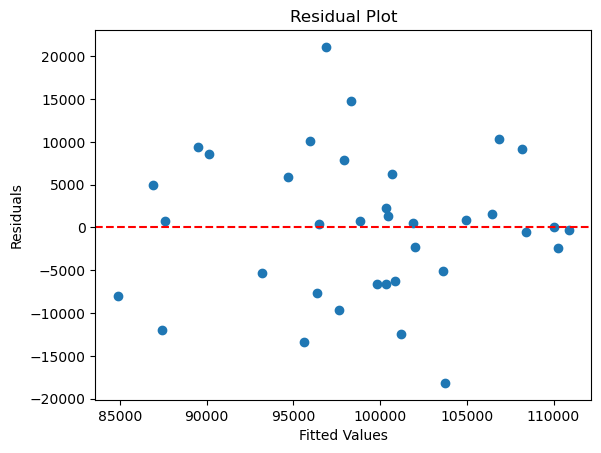

In [ ]:
fitted_values = model.fittedvalues
residuals = model.resid
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Overhead ~ Production Runs

In [ ]:
model_prod = smf.ols(formula='Overhead ~Production_Runs', data=data).fit()
print(model_prod.summary())

                            OLS Regression Results                            
Dep. Variable:               Overhead   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     12.64
Date:                Tue, 10 Sep 2024   Prob (F-statistic):            0.00114
Time:                        16:28:18   Log-Likelihood:                -379.62
No. Observations:                  36   AIC:                             763.2
Df Residuals:                      34   BIC:                             766.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        7.561e+04   6808.611     

In [ ]:
anova_lm(model_prod)

,df,sum_sq,mean_sq,F,PR(>F)
Production_Runs,1.0,1.130248e+09,1.130248e+09,12.637029,0.001135
Residual,34.0,3.040939e+09,8.943938e+07,NaN,NaN


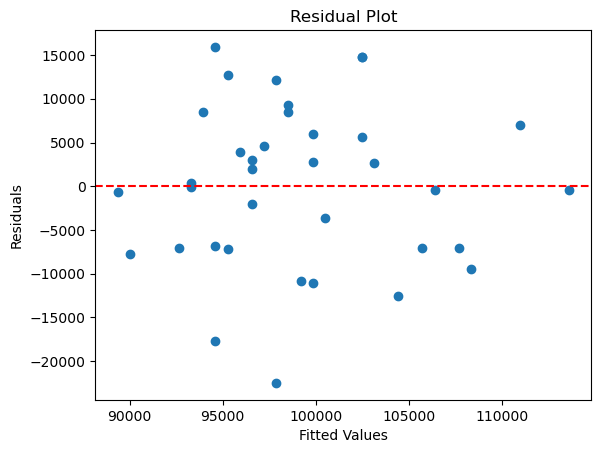

In [ ]:
fitted_values = model_prod.fittedvalues
residuals = model_prod.resid
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Overhead ~ Production Runs + Machine Hours

In [ ]:
model_PM = smf.ols(formula='Overhead ~Production_Runs + Machine_Hours', data=data).fit()
print(model_PM.summary())

                            OLS Regression Results                            
Dep. Variable:               Overhead   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     107.0
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           3.75e-15
Time:                        16:29:36   Log-Likelihood:                -349.07
No. Observations:                  36   AIC:                             704.1
Df Residuals:                      33   BIC:                             708.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3996.6782   6603.651     

In [ ]:
anova_lm(model_PM)

,df,sum_sq,mean_sq,F,PR(>F)
Production_Runs,1.0,1.130248e+09,1.130248e+09,66.942654,1.905817e-09
Machine_Hours,1.0,2.483773e+09,2.483773e+09,147.109602,1.046454e-13
Residual,33.0,5.571662e+08,1.688382e+07,NaN,NaN


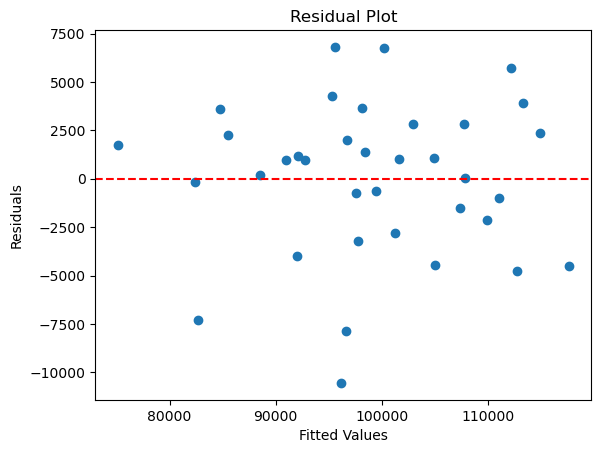

In [ ]:
fitted_values = model_PM.fittedvalues
residuals = model_PM.resid
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()